<a href="https://colab.research.google.com/github/ichiP245/TP-Anal-tica-Descriptiva/blob/main/notebooks/ModeloRL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cargamos las librerias y el dataset nuevo ya limpio

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.feature_selection import SelectKBest, f_regression
from statsmodels.graphics.mosaicplot import mosaic
import statsmodels.api as sm
import time

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df = pd.read_csv('/content/Lianjia Clean.csv',sep=';')

/tmp/ipython-input-2911200300.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Lianjia Clean.csv',sep=';')


In [ ]:
df.head()

,url,id,Lng,Lat,Cid,tradeTime,followers,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,floor,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,distancia_km_a_subte_mas_cercano,piso
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,736185,106,4150080.00,31680,131.00,2,1,1,1,高 26,1.0,2005.0,3,6,0.217,1,0,1.0,7,56021.0,0.733077,26
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,736173,126,5750057.68,43436,132.38,2,2,1,2,高 22,1.0,2004.0,4,6,0.667,1,1,0.0,7,71539.0,0.707238,22
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,736309,48,10300158.00,52021,198.00,3,2,1,3,中 4,4.0,2005.0,3,6,0.500,1,0,0.0,7,48160.0,2.391765,4
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,736237,138,2975068.00,22202,134.00,3,1,1,1,底 21,1.0,2008.0,1,6,0.273,1,0,0.0,6,51238.0,2.150789,21
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,736204,286,3920076.00,48396,81.00,2,1,1,1,中 6,4.0,1960.0,2,2,0.333,0,1,1.0,1,62588.0,0.763286,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318539 entries, 0 to 318538
Data columns (total 27 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   url                               318539 non-null  object 
 1   id                                318539 non-null  object 
 2   Lng                               318539 non-null  float64
 3   Lat                               318539 non-null  float64
 4   Cid                               318539 non-null  int64  
 5   tradeTime                         318539 non-null  int64  
 6   followers                         318539 non-null  int64  
 7   totalPrice                        318539 non-null  float64
 8   price                             318539 non-null  int64  
 9   square                            318539 non-null  float64
 10  livingRoom                        318539 non-null  int64  
 11  drawingRoom                       318539 non-null  i

Esta todo ok

Definimos X e y

In [ ]:
columnas_X = ['tradeTime', 'followers', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
              'bathRoom', 'buildingType', 'constructionTime', 'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty',
              'district', 'communityAverage', 'distancia_km_a_subte_mas_cercano', 'piso']
columna_Y = 'totalPrice'
columna_Y2 = 'price'

In [ ]:
X = df[columnas_X]
y = df[columna_Y]
y2 = df[columna_Y2]

In [ ]:
X

,tradeTime,followers,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,district,communityAverage,distancia_km_a_subte_mas_cercano,piso
0,736185,106,131.00,2,1,1,1,1.0,2005.000000,3,6,0.217,1,0,7,56021.0,0.733077,26
1,736173,126,132.38,2,2,1,2,1.0,2004.000000,4,6,0.667,1,1,7,71539.0,0.707238,22
2,736309,48,198.00,3,2,1,3,4.0,2005.000000,3,6,0.500,1,0,7,48160.0,2.391765,4
3,736237,138,134.00,3,1,1,1,1.0,2008.000000,1,6,0.273,1,0,6,51238.0,2.150789,21
4,736204,286,81.00,2,1,1,1,4.0,1960.000000,2,2,0.333,0,1,1,62588.0,0.763286,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318534,736125,8,170.07,3,2,1,2,4.0,2003.000000,1,6,0.333,0,1,3,36545.0,2.059801,5
318535,736125,1,35.09,1,0,1,1,1.0,2009.000000,1,6,0.222,1,0,3,54282.0,0.685682,24
318536,736120,2,102.17,2,2,1,2,4.0,2000.000000,3,6,0.500,1,1,3,46927.0,0.646323,7
318537,736127,4,178.34,4,2,1,2,4.0,2003.000000,4,2,0.500,0,1,3,54842.0,0.507385,5


In [ ]:
# Vemos cantidad de valores unicos por columna
for col in X:
  print(f'{col}: ', X[col].nunique())

tradeTime:  2550
followers:  547
square:  18292
livingRoom:  8
drawingRoom:  3
kitchen:  3
bathRoom:  4
buildingType:  4
constructionTime:  158
renovationCondition:  4
buildingStructure:  6
ladderRatio:  181
elevator:  2
fiveYearsProperty:  2
district:  13
communityAverage:  4455
distancia_km_a_subte_mas_cercano:  4034
piso:  40


## Encoding de categoricas

No hace falta, porque para 'elevator' y 'fiveYearsProperty' que usariamos One Hot, nos quedaria una sola columna si eliminamos la segunda (drop_first=True).

Sí para los distritos y otras variables categoricas nominales.


In [ ]:
X.head()

,tradeTime,followers,square,livingRoom,drawingRoom,kitchen,bathRoom,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,district,communityAverage,distancia_km_a_subte_mas_cercano,piso
0,736185,106,131.00,2,1,1,1,1.0,2005.0,3,6,0.217,1,0,7,56021.0,0.733077,26
1,736173,126,132.38,2,2,1,2,1.0,2004.0,4,6,0.667,1,1,7,71539.0,0.707238,22
2,736309,48,198.00,3,2,1,3,4.0,2005.0,3,6,0.500,1,0,7,48160.0,2.391765,4
3,736237,138,134.00,3,1,1,1,1.0,2008.0,1,6,0.273,1,0,6,51238.0,2.150789,21
4,736204,286,81.00,2,1,1,1,4.0,1960.0,2,2,0.333,0,1,1,62588.0,0.763286,6


Convertimos a tipo de dato objeto

In [ ]:
X['district'] = X['district'].astype('object')

X['buildingType'] = X['buildingType'].astype('int64')
X['buildingType'] = X['buildingType'].astype('object')

X['renovationCondition'] = X['renovationCondition'].astype('object')
X['buildingStructure'] = X['buildingStructure'].astype('object')

/tmp/ipython-input-2843801232.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['district'] = X['district'].astype('object')
/tmp/ipython-input-2843801232.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['buildingType'] = X['buildingType'].astype('int64')
/tmp/ipython-input-2843801232.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

Pasamos a dummies

In [ ]:
X = pd.get_dummies(X,drop_first=True)
X

,tradeTime,followers,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,ladderRatio,elevator,fiveYearsProperty,communityAverage,distancia_km_a_subte_mas_cercano,piso,buildingType_2,buildingType_3,buildingType_4,renovationCondition_2,renovationCondition_3,renovationCondition_4,buildingStructure_2,buildingStructure_3,buildingStructure_4,buildingStructure_5,buildingStructure_6,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_13
0,736185,106,131.00,2,1,1,1,2005.000000,0.217,1,0,56021.0,0.733077,26,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
1,736173,126,132.38,2,2,1,2,2004.000000,0.667,1,1,71539.0,0.707238,22,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
2,736309,48,198.00,3,2,1,3,2005.000000,0.500,1,0,48160.0,2.391765,4,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False
3,736237,138,134.00,3,1,1,1,2008.000000,0.273,1,0,51238.0,2.150789,21,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False
4,736204,286,81.00,2,1,1,1,1960.000000,0.333,0,1,62588.0,0.763286,6,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318534,736125,8,170.07,3,2,1,2,2003.000000,0.333,0,1,36545.0,2.059801,5,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
318535,736125,1,35.09,1,0,1,1,2009.000000,0.222,1,0,54282.0,0.685682,24,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
318536,736120,2,102.17,2,2,1,2,2000.000000,0.500,1,1,46927.0,0.646323,7,False,False,True,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False
318537,736127,4,178.34,4,2,1,2,2003.000000,0.500,0,1,54842.0,0.507385,5,False,False,True,False,False,True,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [ ]:
X = pd.get_dummies(X,drop_first=True)
for col in X.columns:
  if col.startswith('district_') or col.startswith('buildingType_') or col.startswith('renovationCondition_') or col.startswith('buildingStructure_'):
    X[col] = X[col].astype(int)

## Estandarizamos

Estandarizamos las variables numericas continuas, o sea que no consideramos como discretas.

Lo hacemos para que no sea tan sensibles a las escalas y porque se suele recomendar escalar en modelos de regresión.

In [ ]:
X.columns

Index(['tradeTime', 'followers', 'square', 'livingRoom', 'drawingRoom',
       'kitchen', 'bathRoom', 'constructionTime', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'communityAverage',
       'distancia_km_a_subte_mas_cercano', 'piso', 'buildingType_2',
       'buildingType_3', 'buildingType_4', 'renovationCondition_2',
       'renovationCondition_3', 'renovationCondition_4', 'buildingStructure_2',
       'buildingStructure_3', 'buildingStructure_4', 'buildingStructure_5',
       'buildingStructure_6', 'district_2', 'district_3', 'district_4',
       'district_5', 'district_6', 'district_7', 'district_8', 'district_9',
       'district_10', 'district_11', 'district_12', 'district_13'],
      dtype='object')

In [ ]:
vars_estandarizar = ['tradeTime', 'followers', 'square','constructionTime','ladderRatio',
                     'communityAverage', 'distancia_km_a_subte_mas_cercano']

In [ ]:
scaler = StandardScaler()
X[vars_estandarizar] = scaler.fit_transform(X[vars_estandarizar])

## Correlaciones

Vamos a ver si podemos identificar si hay multicolinealidad.

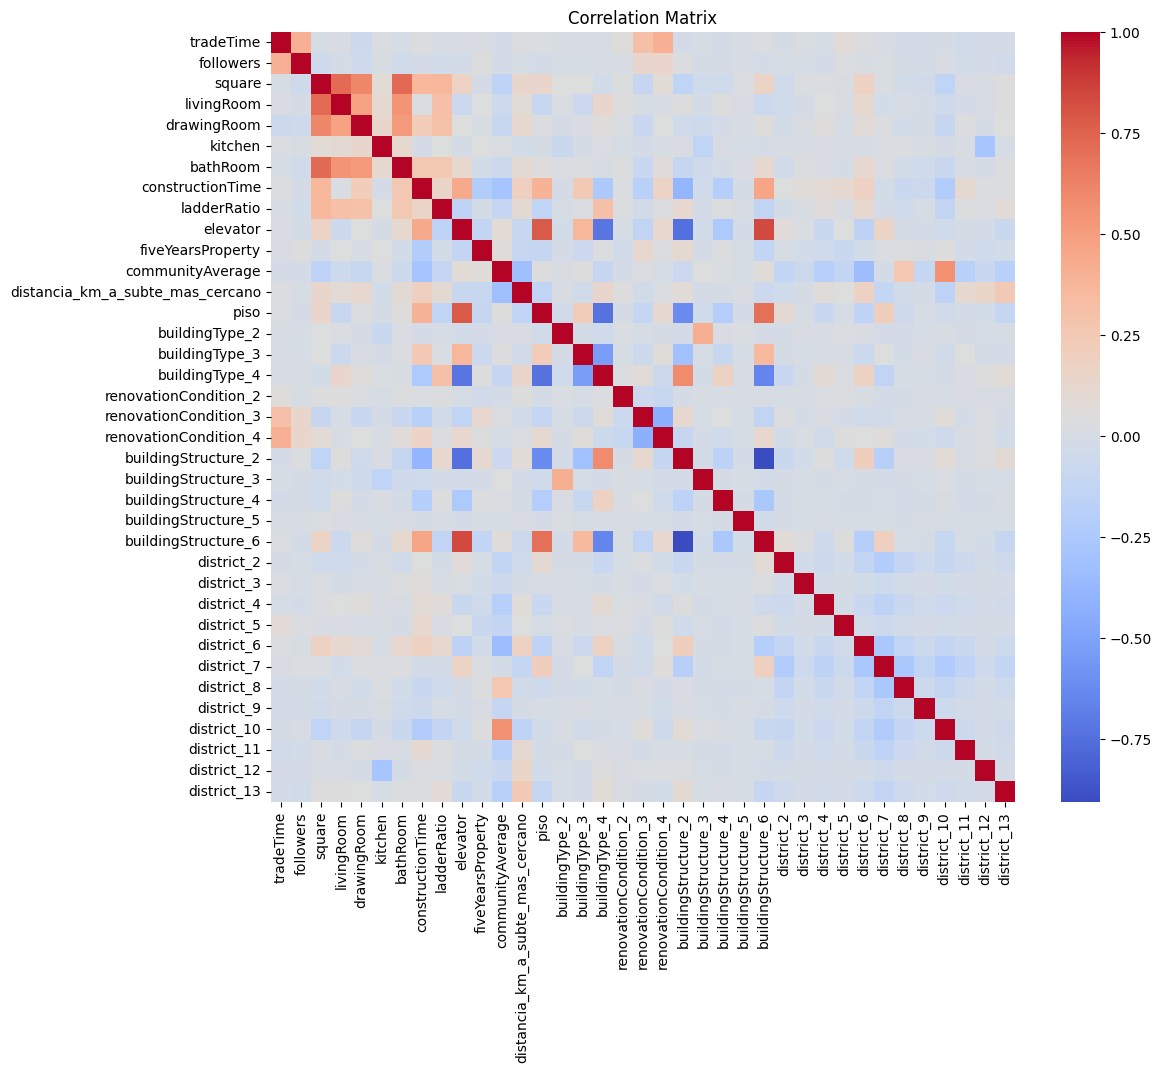

In [ ]:
# Calculate the correlation matrix
corr_matrix = X.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Vemos solo las correlaciones mayores a 0,4, o sea que tiene cierta fuerza

In [ ]:
# Filter for correlations above the threshold
threshold = 0.4
strong_correlations = corr_matrix[abs(corr_matrix) > threshold]

# Display the strong correlations
display(strong_correlations)

,tradeTime,followers,square,livingRoom,drawingRoom,kitchen,bathRoom,constructionTime,ladderRatio,elevator,fiveYearsProperty,communityAverage,distancia_km_a_subte_mas_cercano,piso,buildingType_2,buildingType_3,buildingType_4,renovationCondition_2,renovationCondition_3,renovationCondition_4,buildingStructure_2,buildingStructure_3,buildingStructure_4,buildingStructure_5,buildingStructure_6,district_2,district_3,district_4,district_5,district_6,district_7,district_8,district_9,district_10,district_11,district_12,district_13
tradeTime,1.000000,0.410741,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.405547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
followers,0.410741,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
square,NaN,NaN,1.000000,0.722605,0.602871,NaN,0.731103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
livingRoom,NaN,NaN,0.722605,1.000000,0.480518,NaN,0.551674,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drawingRoom,NaN,NaN,0.602871,0.480518,1.000000,NaN,0.517697,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kitchen,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bathRoom,NaN,NaN,0.731103,0.551674,0.517697,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
constructionTime,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.446450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.466936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ladderRatio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
elevator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.446450,NaN,1.000000,NaN,NaN,NaN,0.777226,NaN,NaN,-0.724662,NaN,NaN,NaN,-0.746322,NaN,NaN,NaN,0.838156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Tener o no ascensor se relaciona con ciertos tipos de estructura del edificio y el piso lo mismo.

La cantidad de metros cuadrados se relaciona con las habitaciones y baños, variables que tienen sentido que se relacionen.

Vemos que no podemos identifcar relacion entre drawingRoom y kitchen.

Hay un problema con kitchen, lo comprobamos en el recuento de valores.

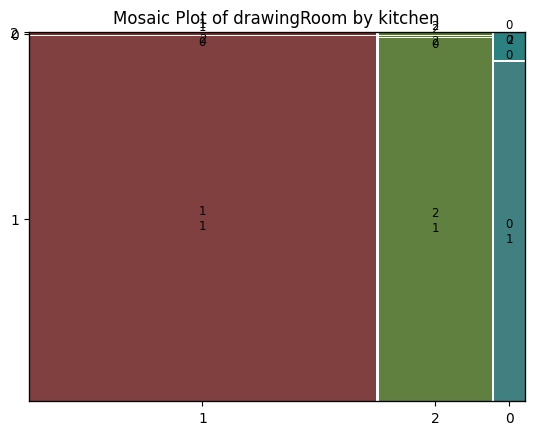

In [ ]:
vars_mosaic = ['drawingRoom','kitchen']
mosaic(df, vars_mosaic)
plt.title(f'Mosaic Plot of {vars_mosaic[0]} by {vars_mosaic[1]}')
plt.show()

In [ ]:
X['kitchen'].value_counts()

,count
kitchen,
1,315014
0,2676
2,849


Vemos que hay diversidad. No estan relacionadas

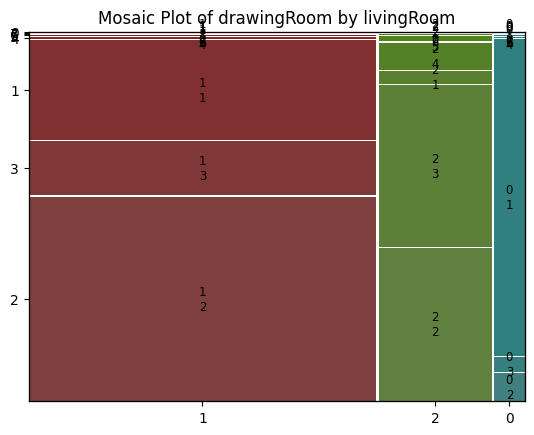

In [ ]:
vars_mosaic = ['drawingRoom','livingRoom']
mosaic(df, vars_mosaic)
plt.title(f'Mosaic Plot of {vars_mosaic[0]} by {vars_mosaic[1]}')
plt.show()

drawingRoom y bathRoom no estan relacionadas. Las proporciones son distintas para distintos valores de las variables.

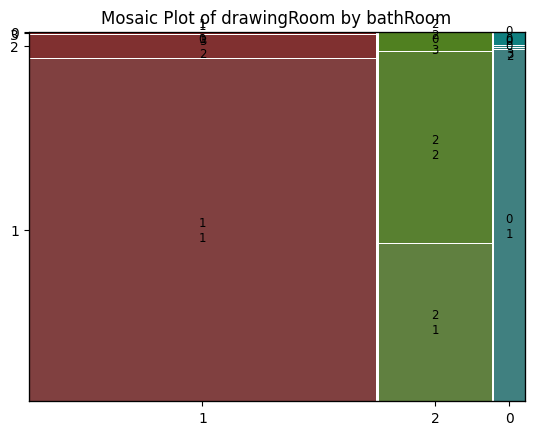

In [ ]:
vars_mosaic = ['drawingRoom','bathRoom']
mosaic(df, vars_mosaic)
plt.title(f'Mosaic Plot of {vars_mosaic[0]} by {vars_mosaic[1]}')
plt.show()

Tener o no ascensor sí se relaciona con el tipo de edificio. Ser del tipo 4 es sinónimo de no tener ascensor.

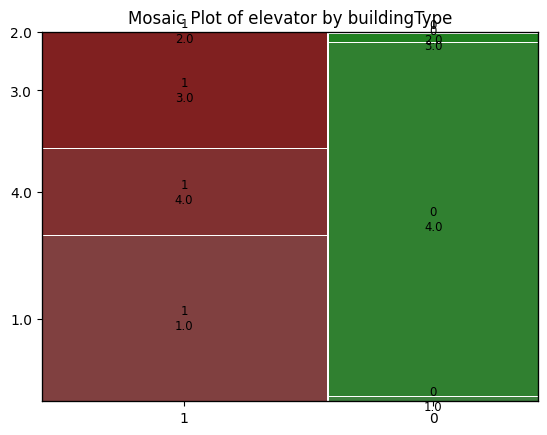

In [ ]:
vars_mosaic = ['elevator','buildingType']
mosaic(df, vars_mosaic)
plt.title(f'Mosaic Plot of {vars_mosaic[0]} by {vars_mosaic[1]}')
plt.show()

## Dividimos datos

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelos

Definimos funciones que vamos a usar más abajo

In [ ]:
def root_mean_squared_error(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [ ]:
def forward_selection(X, y,AIC=True, verbose=True):
    remaining = list(X.columns)
    selected = []
    current_score, best_new_score = np.inf, np.inf
    while remaining:
        scores_with_candidates = []
        for candidate in remaining:
            formula = selected + [candidate]
            X_model = sm.add_constant(X[formula])
            model = sm.OLS(y, X_model).fit()
            if AIC:
              aic = model.aic
              scores_with_candidates.append((aic, candidate))
            else:
              bic = model.bic
              scores_with_candidates.append((bic, candidate))
        scores_with_candidates.sort()
        best_new_score, best_candidate = scores_with_candidates[0]
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            current_score = best_new_score
            if verbose:
              if AIC:
                print(f"Añadido: {best_candidate}, AIC = {current_score:.2f}")
              else:
                print(f"Añadido: {best_candidate}, BIC = {current_score:.2f}")
        else:
            break
    return selected

In [ ]:
def backward_elimination(X, y,AIC=True, verbose=True):
    selected = list(X.columns)
    current_score = np.inf
    while len(selected) > 0:
        scores_with_candidates = []
        for candidate in selected:
            formula = list(selected)
            formula.remove(candidate)
            X_model = sm.add_constant(X[formula], has_constant='add')
            try:
                model = sm.OLS(y, X_model).fit(disp=0)
                if AIC:
                  aic = model.aic
                  scores_with_candidates.append((aic, candidate))
                else:
                  bic = model.bic
                  scores_with_candidates.append((bic, candidate))
            except:
                continue
        if not scores_with_candidates:
            break
        scores_with_candidates.sort()
        best_new_score, worst_candidate = scores_with_candidates[0]
        if best_new_score < current_score:              # Chequear esta condicion
            selected.remove(worst_candidate)
            current_score = best_new_score
            if verbose:
              if AIC:
                print(f"Eliminado: {worst_candidate}, AIC = {current_score:.2f}")
              else:
                print(f"Eliminado: {worst_candidate}, BIC = {current_score:.2f}")
        else:
            break
    return selected

In [ ]:
# Función para guardar los resultados
def guardo_resultados(nombre_modelo, y_test, y_pred, tiempo_ejecucion):
    # Calcular las métricas
    RMSE = root_mean_squared_error(y_test, y_pred)
    MSE = mean_squared_error(y_test, y_pred)
    MAE = mean_absolute_error(y_test, y_pred)
    R2 = r2_score(y_test, y_pred)

    # Crear un diccionario con los resultados
    resultados_dict = {
        'Modelo': [nombre_modelo],
        'RMSE': [RMSE],
        'MSE': [MSE],
        'MAE': [MAE],
        'R2': [R2],
        'Tiempo': [tiempo_ejecucion]
    }

    # Convertir el diccionario a un DataFrame
    resultados_df = pd.DataFrame(resultados_dict)

    return resultados_df

### Establecemos un baseline

Nunca un modelo nos puede dar peor que este valor. El baseline va a ser el RMSE de predecir todas las propiedades con el promedio de precio de venta de las propiedades del set de entrenamiento

In [ ]:
start1 = time.time()
root_mean_squared_error(y_test, [y_train.mean()]*len(y_test))
end1 = time.time()

In [ ]:
model0 = guardo_resultados('Baseline', y_test, [y_train.mean()]*len(y_test), end1-start1)
model0

,Modelo,RMSE,MSE,MAE,R2,Tiempo
0,Baseline,2.281218e+06,5.203953e+12,1.553759e+06,-0.000008,0.004349


### Modelo 1: regresion lineal multiple simple

Usamos todas las variables y corremos el primer modelo lineal multiple

In [ ]:
start2 = time.time()
linear_model = LinearRegression(fit_intercept=True)  # fit_intercept es el único parámetro relevante
linear_model.fit(X_train, y_train)

y_pred = linear_model.predict(X_test)
end2 = time.time()

In [ ]:
model1 = guardo_resultados('Regresion lineal multiple simple', y_test, y_pred, end2-start2)
model1 = pd.concat([model1,model0])
model1

,Modelo,RMSE,MSE,MAE,R2,Tiempo
0,Regresion lineal multiple simple,1.071566e+06,1.148253e+12,6.952304e+05,0.779348,0.291104
0,Baseline,2.281218e+06,5.203953e+12,1.553759e+06,-0.000008,0.004349


Vemos cuales son las variables mas importantes

In [ ]:
# Vemos variables mas importantes

selector = SelectKBest(score_func=f_regression, k=20)
X_new = selector.fit_transform(X_train, y_train)
print("Selected feature indices:")
lista = X_train.columns[selector.get_support(indices=True)].to_list()
for i in range(len(lista)):
  print(f'{i+1}. {lista[i]}')

Selected feature indices:
1. tradeTime
2. followers
3. square
4. livingRoom
5. drawingRoom
6. bathRoom
7. constructionTime
8. ladderRatio
9. elevator
10. communityAverage
11. distancia_km_a_subte_mas_cercano
12. piso
13. renovationCondition_4
14. buildingStructure_2
15. buildingStructure_6
16. district_6
17. district_8
18. district_10
19. district_11
20. district_13


In [ ]:
# Variables menos importantes
[i for i in X.columns if i not in lista]

['kitchen',
 'fiveYearsProperty',
 'buildingType_2',
 'buildingType_3',
 'buildingType_4',
 'renovationCondition_2',
 'renovationCondition_3',
 'buildingStructure_3',
 'buildingStructure_4',
 'buildingStructure_5',
 'district_2',
 'district_3',
 'district_4',
 'district_5',
 'district_7',
 'district_9',
 'district_12']

Hacemos un forward_selection.

Abajo estan comentados. Pero vimos que la mayoria se seleccionan.

In [ ]:
seleccionadas_f_A = forward_selection(X_train, y_train)

print("\nVariables seleccionadas:", seleccionadas_f_A)
print("\nCantidad de variables seleccionadas: ",len(seleccionadas_f_A))
print("\nCantidad de variables totales: ",len(X_train.columns))

Añadido: square, AIC = 8088163.72
Añadido: communityAverage, AIC = 7961229.77
Añadido: tradeTime, AIC = 7828620.48
Añadido: district_10, AIC = 7823866.68
Añadido: district_6, AIC = 7820837.36
Añadido: renovationCondition_3, AIC = 7818399.19
Añadido: renovationCondition_4, AIC = 7815066.47
Añadido: renovationCondition_2, AIC = 7812753.43
Añadido: ladderRatio, AIC = 7811844.86
Añadido: district_13, AIC = 7811063.34
Añadido: district_5, AIC = 7810302.72
Añadido: buildingStructure_6, AIC = 7809625.50
Añadido: followers, AIC = 7808922.60
Añadido: fiveYearsProperty, AIC = 7808476.42
Añadido: distancia_km_a_subte_mas_cercano, AIC = 7808019.34
Añadido: district_9, AIC = 7807638.58
Añadido: district_7, AIC = 7807252.09
Añadido: district_2, AIC = 7806876.12
Añadido: district_8, AIC = 7806199.17
Añadido: district_12, AIC = 7805871.29
Añadido: piso, AIC = 7805594.41
Añadido: bathRoom, AIC = 7805338.48
Añadido: constructionTime, AIC = 7805089.79
Añadido: district_3, AIC = 7805004.12
Añadido: buildi

Solo sacamos 2 variables

In [ ]:
set(X_train) - set(seleccionadas_f_A)

{'buildingStructure_3', 'buildingStructure_5'}

In [ ]:
seleccionadas_f_B = forward_selection(X_train, y_train, AIC=False)

print("\nVariables seleccionadas:", seleccionadas_f_B)
print("\nCantidad de variables seleccionadas: ",len(seleccionadas_f_B))
print("\nCantidad de variables totales: ",len(X_train.columns))

Añadido: square, BIC = 8088184.61
Añadido: communityAverage, BIC = 7961261.12
Añadido: tradeTime, BIC = 7828662.27
Añadido: district_10, BIC = 7823918.93
Añadido: district_6, BIC = 7820900.05
Añadido: renovationCondition_3, BIC = 7818472.32
Añadido: renovationCondition_4, BIC = 7815150.06
Añadido: renovationCondition_2, BIC = 7812847.47
Añadido: ladderRatio, BIC = 7811949.34
Añadido: district_13, BIC = 7811178.27
Añadido: district_5, BIC = 7810428.10
Añadido: buildingStructure_6, BIC = 7809761.32
Añadido: followers, BIC = 7809068.87
Añadido: fiveYearsProperty, BIC = 7808633.14
Añadido: distancia_km_a_subte_mas_cercano, BIC = 7808186.52
Añadido: district_9, BIC = 7807816.20
Añadido: district_7, BIC = 7807440.16
Añadido: district_2, BIC = 7807074.64
Añadido: district_8, BIC = 7806408.14
Añadido: district_12, BIC = 7806090.71
Añadido: piso, BIC = 7805824.28
Añadido: bathRoom, BIC = 7805578.79
Añadido: constructionTime, BIC = 7805340.55
Añadido: district_3, BIC = 7805265.33
Añadido: buildi

In [ ]:
set(X_train) - set(seleccionadas_f_B)

{'buildingStructure_3', 'buildingStructure_5'}

Saca las mismas 2 variables

In [ ]:
# seleccionadas_b_A = backward_elimination(X_train, y_train)

# print("\nVariables seleccionadas:", seleccionadas_b_A)
# print("\nCantidad de variables seleccionadas: ",len(seleccionadas_b_A))
# print("\nCantidad de variables totales: ",len(X_train.columns))

In [ ]:
# seleccionadas_b_B = backward_elimination(X_train, y_train, AIC=False)

# print("\nVariables seleccionadas:", seleccionadas_b_B)
# print("\nCantidad de variables seleccionadas: ",len(seleccionadas_b_B))
# print("\nCantidad de variables totales: ",len(X_train.columns))

Corremos el modelo con *statsmodel* para ver los p-valores de las variables

In [ ]:
## Probamos con statsmodel para ver mas a las variables
X_train_sm = sm.add_constant(X_train)
log_reg_sm = sm.OLS(y_train, X_train_sm).fit()
print(log_reg_sm.summary())

                            OLS Regression Results                            
Dep. Variable:             totalPrice   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 2.459e+04
Date:                Tue, 11 Nov 2025   Prob (F-statistic):               0.00
Time:                        15:25:46   Log-Likelihood:            -3.9022e+06
No. Observations:              254831   AIC:                         7.805e+06
Df Residuals:                  254793   BIC:                         7.805e+06
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

La gran mayoría son significativas

### Modelo 1 bis: sacamos algunas variables

Nos quedamos con un grupo reducido de variables, sacando dummies para ver cuanto varian los resultados

In [ ]:
vars_probar = ['tradeTime', 'followers', 'square', 'livingRoom', 'drawingRoom',
      'bathRoom', 'constructionTime', 'ladderRatio', 'elevator',
       'communityAverage','distancia_km_a_subte_mas_cercano']

Corremos el modelo

In [ ]:
start3 = time.time()
linear_model = LinearRegression(fit_intercept=True)  # fit_intercept es el único parámetro relevante
linear_model.fit(X_train[vars_probar], y_train)

y_pred = linear_model.predict(X_test[vars_probar])
end3 = time.time()

In [ ]:
model2 = guardo_resultados('Regresion lineal multiple simple (bis)', y_test, y_pred, end3-start3)
model2 = pd.concat([model2,model1])
model2

,Modelo,RMSE,MSE,MAE,R2,Tiempo
0,Regresion lineal multiple simple (bis),1.113093e+06,1.238976e+12,7.302864e+05,0.761915,0.108613
0,Regresion lineal multiple simple,1.071566e+06,1.148253e+12,6.952304e+05,0.779348,0.291104
0,Baseline,2.281218e+06,5.203953e+12,1.553759e+06,-0.000008,0.004349


Vemos que el modelo empeoro. Casi un 2% menos de R^2 y aumento el RMSE

### Modelo 2: elevamos el grado del polinomio

Buscamos polinomios de mayor orden

Probamos para el ultimo grupo de variables como varian los errores a medida que aumenta el grado del polinomio

Mínimo de error en test con grado 3


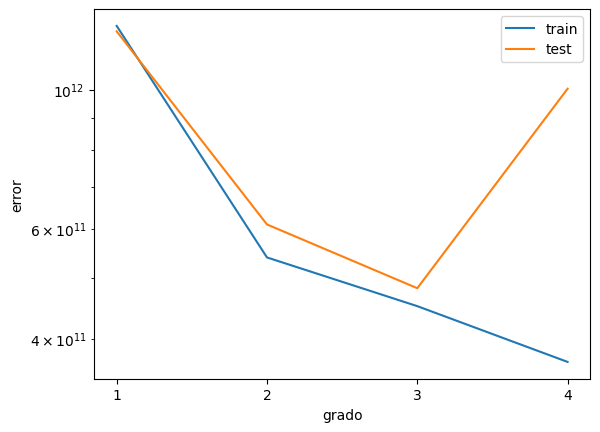

In [ ]:
# Graficamos los errores en train y test para distintos grados
train_errors = []
test_errors = []
degrees = np.arange(1, 5)
for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train2_poly = poly.fit_transform(X_train[vars_probar])
    reg = LinearRegression()
    reg.fit(X_train2_poly, y_train)
    train_errors.append(mean_squared_error(y_train, reg.predict(X_train2_poly)))
    test_errors.append(mean_squared_error(y_test, reg.predict(poly.transform(X_test[vars_probar]))))

plt.plot(degrees, train_errors, label='train')
plt.plot(degrees, test_errors, label='test')
plt.xticks(degrees)
plt.yscale('log')
plt.legend()
plt.xlabel('grado')
plt.ylabel('error')
print('Mínimo de error en test con grado',degrees[np.argmin(test_errors)])

A partir de 3, o sea cuando prueba con polinomio de grado 4, hay overfitting

Probamos con menos variables aun, pero mayor grado

Mínimo de error en test con grado 3


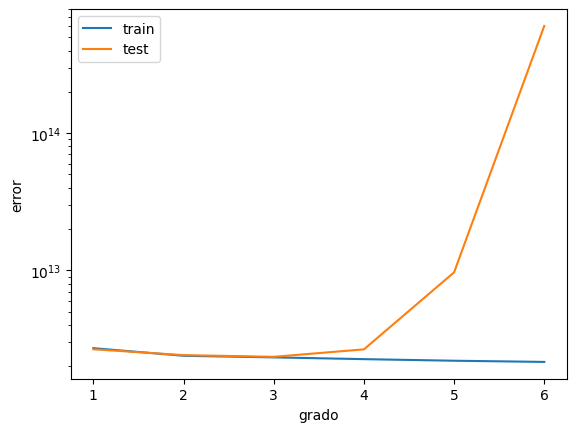

In [ ]:
# Graficamos los errores en train y test para distintos grados
train_errors = []
test_errors = []
degrees = np.arange(1, 7)
for degree in degrees:
    poly = PolynomialFeatures(degree=degree, include_bias=False)
    X_train2_poly = poly.fit_transform(X_train[vars_probar[:5]])
    reg = LinearRegression()
    reg.fit(X_train2_poly, y_train)
    train_errors.append(mean_squared_error(y_train, reg.predict(X_train2_poly)))
    test_errors.append(mean_squared_error(y_test, reg.predict(poly.transform(X_test[vars_probar[:5]]))))

plt.plot(degrees, train_errors, label='train')
plt.plot(degrees, test_errors, label='test')
plt.xticks(degrees)
plt.yscale('log')
plt.legend()
plt.xlabel('grado')
plt.ylabel('error')
print('Mínimo de error en test con grado',degrees[np.argmin(test_errors)])

In [ ]:
test_errors[np.argmin(test_errors)]

2343498509379.1826

Los resultados son muy malos. Nos quedamos con grado 3 de las variables reducidas

In [ ]:
start4 = time.time()

poly = PolynomialFeatures(degree=3, include_bias=False)
X_train2_poly = poly.fit_transform(X_train[vars_probar])
X_test2_poly = poly.transform(X_test[vars_probar])

poly_model = LinearRegression()
poly_model.fit(X_train2_poly, y_train)

y_pred = poly_model.predict(X_test2_poly)
end4 = time.time()

In [ ]:
modelo3 = guardo_resultados('Regresion lineal multiple polinomial', y_test, y_pred, end4-start4)
modelo3 = pd.concat([modelo3,model2])
modelo3

,Modelo,RMSE,MSE,MAE,R2,Tiempo
0,Regresion lineal multiple polinomial,6.941085e+05,4.817867e+11,4.426834e+05,0.907418,8.029466
0,Regresion lineal multiple simple (bis),1.113093e+06,1.238976e+12,7.302864e+05,0.761915,0.108613
0,Regresion lineal multiple simple,1.071566e+06,1.148253e+12,6.952304e+05,0.779348,0.291104
0,Baseline,2.281218e+06,5.203953e+12,1.553759e+06,-0.000008,0.004349


El modelo mejoró considerablemente. Una reducción del RMSE de casi un 50% y R^2 de 90%

### Modelo 3: agregamos regularizacion (Ridge regularization)

Probamos ver qué pasa cuando regularizamos (grupo de variables reducidas de grado 3 que usamos para el modelo 2) pero los resultados de la regularizacion no justifican probar con ese modelo

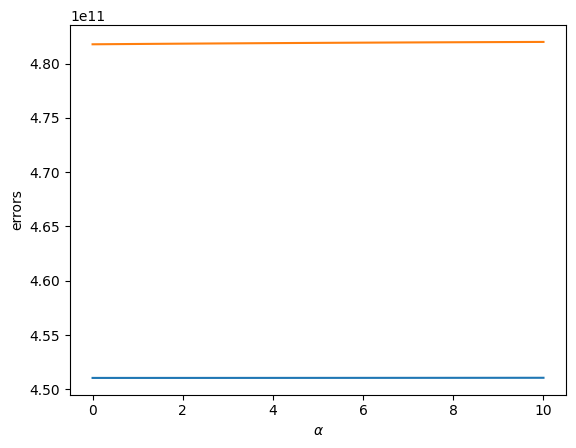

In [ ]:
# Vemos como varia el error cuadratico medio a medida que cambia el alpha
# (manteniendo constante el grado del polinomio de regresion)

alphas = np.linspace(0.001,10,75)
train_errors = []
r2_train = []

test_errors = []
r2_test = []
for alpha in alphas:
  reg_Ridge = Ridge(alpha=alpha)
  reg_Ridge.fit(X_train2_poly, y_train)
  train_error = mean_squared_error(y_train, reg_Ridge.predict(X_train2_poly))
  train_errors.append(train_error)
  r2_train.append(r2_score(y_train, reg_Ridge.predict(X_train2_poly)))

  test_error = mean_squared_error(y_test, reg_Ridge.predict(X_test2_poly))
  test_errors.append(test_error)
  r2_test.append(r2_score(y_test, reg_Ridge.predict(X_test2_poly)))

plt.plot(alphas,train_errors,'-')
plt.plot(alphas,test_errors,'-')
plt.xlabel(r'$\alpha$')
plt.ylabel('errors');

### Modelo 4: optimizamos hiperparametros con Random Search CV

Buscamos ver si con todas las variables y grado 2, cual es el alpha optimo y cuanto nos dan los resultados

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
# Suponemos que ya tenemos X_train, X_test, y_train, y_test

# Definimos un grado y un alpha
degree = 2
alpha = 0.1

pipeline = Pipeline([
    ("poly", PolynomialFeatures(degree=degree)),  # Vamos a querer que le aplique esto a cada conjunto de X
    # ("scaler", StandardScaler()),   # Vamos a querer que estandarize (para mejor funcionamiento de la regularizacion)
    ("ridge_regression", Ridge(alpha=alpha, max_iter=5000)) # Vamos a querer que aplique la regresion con regularizacion
])

scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring="neg_root_mean_squared_error")

# Entonces, va a separar el conjunto en 5 splits y va a iterar esa cantidad de veces
# Va a agarrar cuatro de esos conjuntos para train, va a hacer la regresion Lasso y va a predecir en el conjunto restante
# Va a repetir eso otras 4 veces
print("RMSE por fold:", -scores)
print("RMSE promedio:", -np.mean(scores))
print("Desvío estándar del RMSE:", np.std(-scores))

RMSE por fold: [698070.04002975 702333.1898285  695414.20309224 691389.22388994
 676000.98497323]
RMSE promedio: 692641.5283627312
Desvío estándar del RMSE: 9050.532766992392


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

param_dist = {
    "ridge_regression__alpha": loguniform(1e-3, 10),  # distribución log-uniforme
    }

random_search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_dist,
    n_iter=20,
    cv=5,
    scoring="neg_root_mean_squared_error",
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Mejor alpha (Randomized):", random_search.best_params_)
print("Mejor RMSE (CV, Randomized):", -random_search.best_score_)

Mejor alpha (Randomized): {'ridge_regression__alpha': np.float64(7.579479953348009)}
Mejor RMSE (CV, Randomized): 691691.124607535


El mejor RMSE es apenas mas chico de lo que habiamos conseguido para test en la polinomial de grado 3

In [ ]:
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

In [ ]:
modelo4 = guardo_resultados('Regresion lineal optimizada Random Search', y_test, y_pred, '13 mins')
modelo4 = pd.concat([modelo4,modelo3])
modelo4

,Modelo,RMSE,MSE,MAE,R2,Tiempo
0,Regresion lineal optimizada Random Search,7.077932e+05,5.009712e+11,4.538679e+05,0.903732,13 mins
0,Regresion lineal multiple polinomial,6.941085e+05,4.817867e+11,4.426834e+05,0.907418,8.029466
0,Regresion lineal multiple simple (bis),1.113093e+06,1.238976e+12,7.302864e+05,0.761915,0.108613
0,Regresion lineal multiple simple,1.071566e+06,1.148253e+12,6.952304e+05,0.779348,0.291104
0,Baseline,2.281218e+06,5.203953e+12,1.553759e+06,-0.000008,0.004349


# Conclusión

Nos quedamos con el modelo de RLM polinomial de vars_probar.

Es un modelo que corrió rápido y con un RMSE muy bueno en comparación con lo que se puede obtener con un modelo de grado 2 con todas las variables.

Las técnicas de forward_selection sacaron muy pocas variables, por lo que la selección tuvo que hacerse a criterio. Decidieron quitarse las variables *dummies* para poder probar con polinomial. Pero vimos que grado 3 es el optimo para variables reducidas, y para todas las variables sería muy difícil probar con grados mayores a 2.

Por todo esto, nos quedamos con el modelo dado que explica un 90% de variabilidad y es notablemente mejor que el resto de los modelos probados.